In [ ]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, classification_report, precision_score, recall_score, f1_score

import zipfile
import os
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils import shuffle, class_weight
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# unzip spectrogram data
os.system("7z x spectrogram.7z")

34304

In [ ]:
# force reset CUDA GPU cache
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
# regenerate train and test set, takes some time
labels_df = pd.read_csv('outcomes.csv')
filenames = labels_df["filename"]
labels = labels_df["Apgar1"]
images = []
for filename in filenames:
    try:
        path = os.path.join(os.getcwd(), 'spectrogram', filename)
        img = tf.keras.preprocessing.image.load_img(path, target_size=(312, 312))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
    except Exception as e:
        print(f"Error loading image {filename}: {e}")

train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.25, random_state=42)

train_images = tf.convert_to_tensor(train_images)
test_images = tf.convert_to_tensor(test_images)

train_images = tf.convert_to_tensor(train_images)
test_images = tf.convert_to_tensor(test_images)

np.save('train_images.npy', train_images)
np.save('test_images.npy', test_images)
np.save('train_labels.npy', train_labels)
np.save('test_labels.npy', test_labels)

In [ ]:
# use pregenerated sets instead
train_images = np.load('train_images.npy')
test_images = np.load('test_images.npy')
train_images = np.load('train_images.npy')
test_images = np.load('test_images.npy')

Epoch 1/20
5/5 [==============================] - 137s 18s/step - loss: 7.0436 - accuracy: 0.5290 - val_loss: 4.7324 - val_accuracy: 0.7019
Epoch 2/20
5/5 [==============================] - 8s 2s/step - loss: 4.2702 - accuracy: 0.5903 - val_loss: 3.8971 - val_accuracy: 0.7019
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 3.6510 - accuracy: 0.6129 - val_loss: 3.6246 - val_accuracy: 0.7019
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 3.2685 - accuracy: 0.6323 - val_loss: 3.2389 - val_accuracy: 0.7019
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 2.9821 - accuracy: 0.6290 - val_loss: 2.6861 - val_accuracy: 0.7019
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 2.7609 - accuracy: 0.6323 - val_loss: 2.5364 - val_accuracy: 0.7019
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 2.6035 - accuracy: 0.6323 - val_loss: 2.4194 - val_accuracy: 0.7019
Epoch 8/20
5/5 [======================

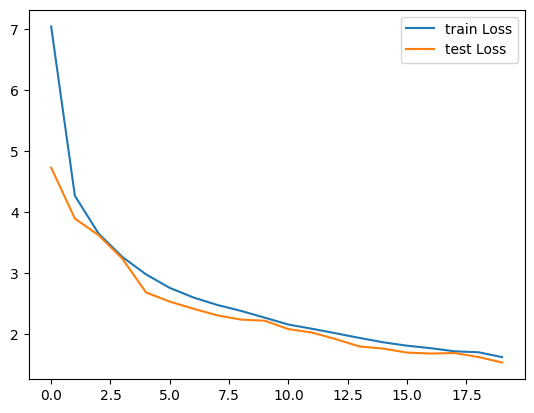

5/5 - 12s - loss: 1.7578 - accuracy: 0.5435 - 12s/epoch - 2s/step


In [ ]:
# CNN
model = Sequential([
    layers.Conv2D(96, (3, 3), activation='relu', input_shape=(312, 312, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    layers.Conv2D(384, (3, 3), activation='relu'),
    layers.Conv2D(384, (3, 3), activation='relu'),
    layers.Conv2D(384, (3, 3), activation='relu'),

    layers.GlobalAveragePooling2D(),

    layers.Dense(4096, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.8),

    layers.Dense(4096, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.8),

    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.25, verbose=1)

plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='test Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)